### QQPlots

Load in the data below, and use the exercises to assist with answering the quiz questions below.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [5]:
print("seaborn version: {}".format(sb.__version__))
sb.set(style="whitegrid")

seaborn version: 0.9.0


In [6]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [7]:
sample_data.height.describe()

count    200.000000
mean      67.579074
std        3.173014
min       57.565921
25%       65.071402
50%       67.842137
75%       69.904792
max       76.194046
Name: height, dtype: float64

In [8]:
# 3 and 7
height_min = sample_data.height.describe()[3]
height_max = sample_data.height.describe()[7]
number_of_values = sample_data.shape[0]

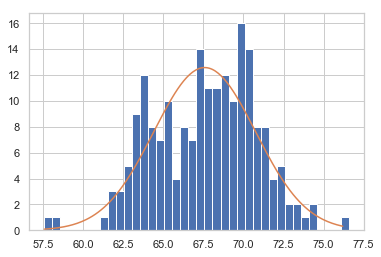

In [9]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);


# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()

from scipy.stats import norm

x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);


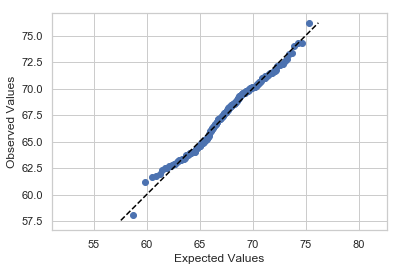

In [10]:
n_points = number_of_values
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)
plt.scatter(expected_vals, sample_data['height'].sort_values())
plt.plot([height_min,height_max],[height_min,height_max],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values');


Text(0, 0.5, 'Observed Standard Scores')

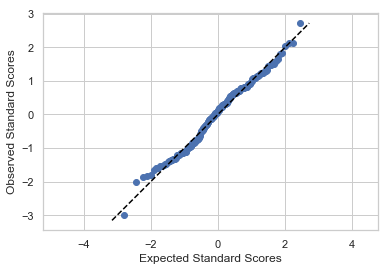

In [11]:
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores') 


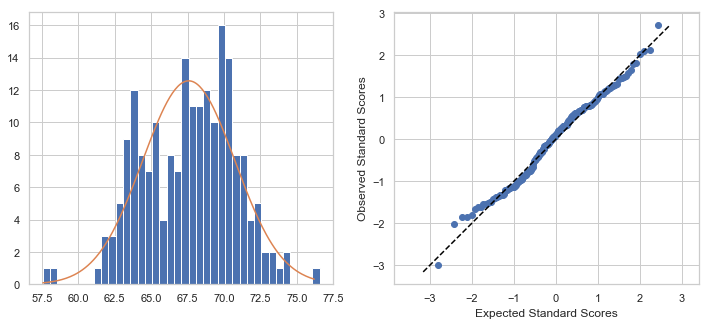

In [12]:
plt.figure(figsize = [12, 5])
# left subplot: plot the data
# create a histogram of the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()
from scipy.stats import norm
x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

Text(0, 0.5, 'Observed Standard Scores')

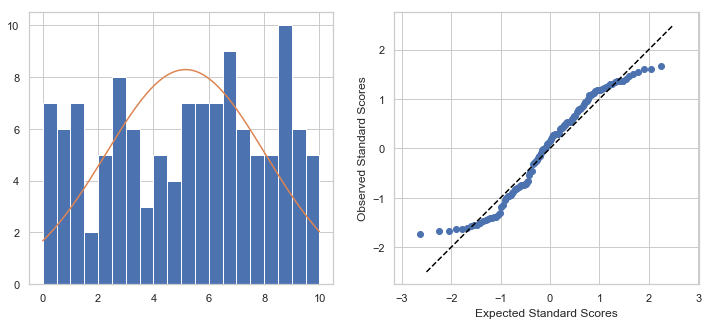

In [13]:
# generate the data

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)
# set up the figure
plt.figure(figsize = [12, 5])
# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()
from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')


<BarContainer object of 81 artists>

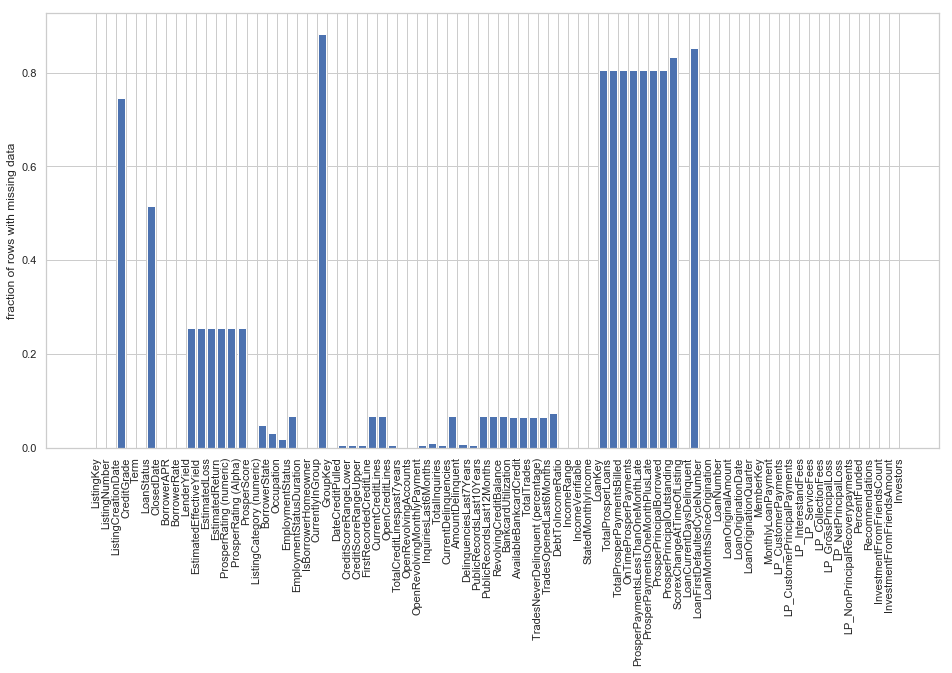

In [42]:
df=pd.read_csv('prosperLoanData.csv')
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [59]:
df.shape[0]

113937

<BarContainer object of 81 artists>

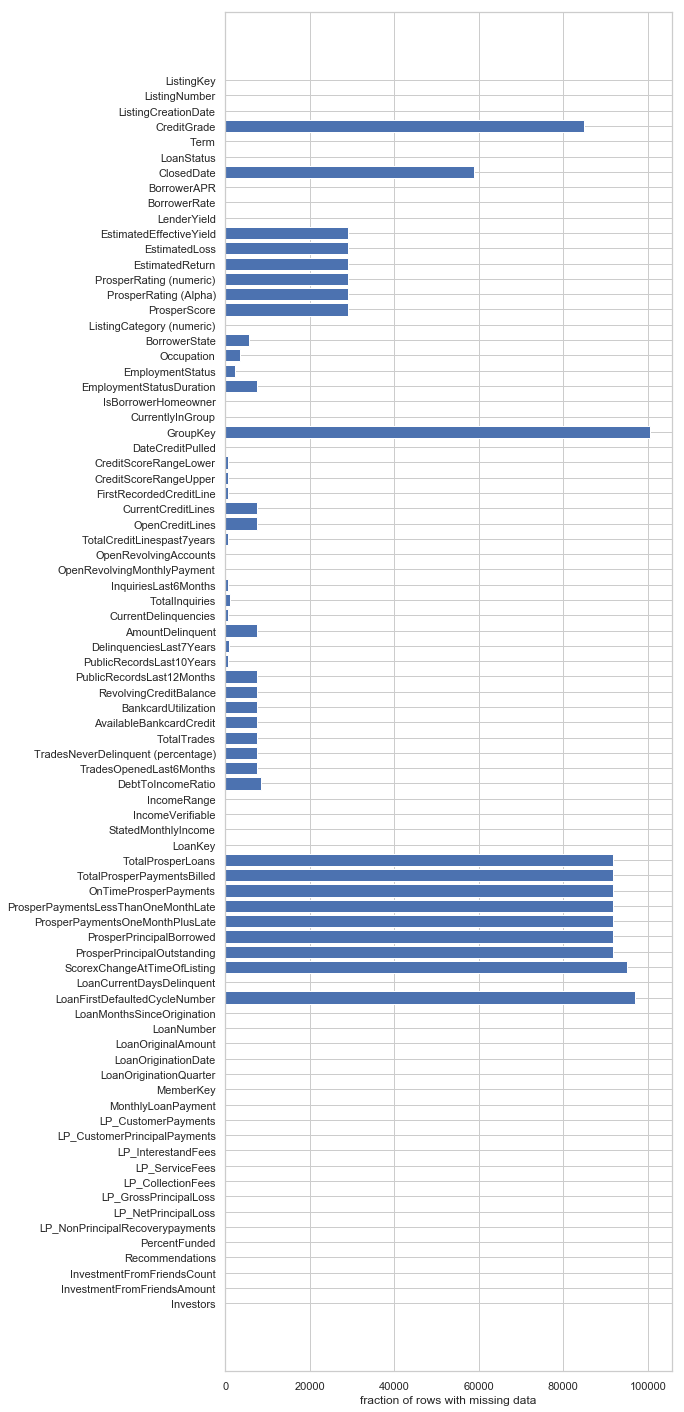

In [43]:

null_counts = df.isnull().sum()/1
plt.figure(figsize=(8,25))
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.xlabel('fraction of rows with missing data')
plt.gca().invert_yaxis()
plt.barh(np.arange(len(null_counts)),null_counts)




C:\Users\d034390\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


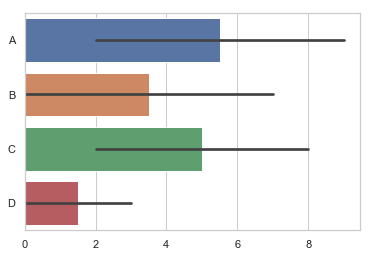

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame(np.random.randint(0,10,size=(2, 4)), columns=list('ABCD'))
sns.barplot(data=df, orient = 'h');

Text(20000, 7, '25 in total missing.')

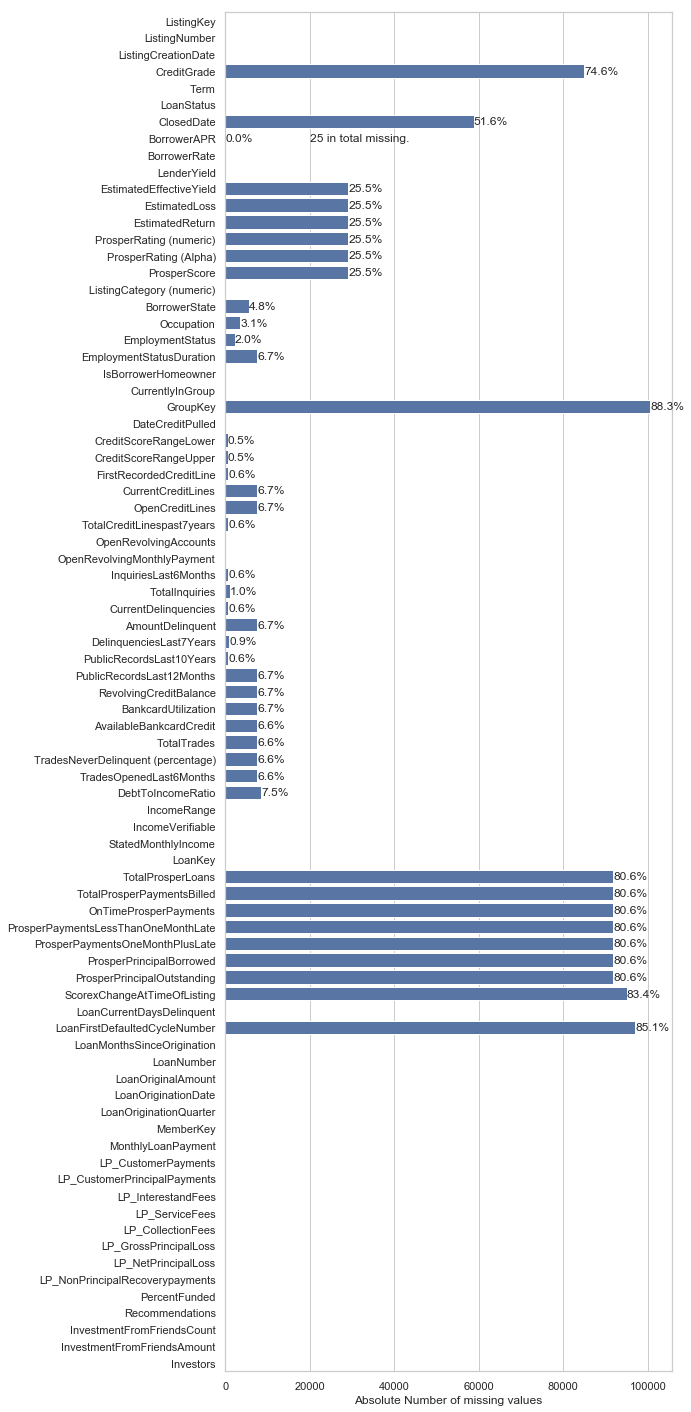

In [81]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(8,25))
plt.xlabel('Absolute Number of missing values')
sns.barplot(x=null_counts, y=np.arange(len(null_counts)), orient = 'h', color=base_color)
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal');

for i in np.arange(len(null_counts)):
    prop = null_counts[i]/len(df)
    if prop > 0:
        pct_string = '{:0.1f}%'.format(100*prop)
        #print(pct_string)
        plt.text(null_counts[i]+1, i, pct_string, va = 'center')
plt.text(20000, 7, '25 in total missing.', va = 'center')

In [25]:
null_counts
np.arange(len(null_counts))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [17]:
df

,A,B,C,D
0,9,0,8,0
1,2,7,2,3


In [18]:
len(null_counts)

81

In [54]:
null_counts.index

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [20]:
import scipy as sci

In [21]:
sci.stats.shapiro(sample_data.height)

(0.9869360327720642, 0.06234946846961975)

In [1]:
for i in np.arange(len(null_counts)):
    prop = null_counts[i]/len(df)
    pct_string = '{:0.1f}%'.format(100*prop)
    #print(pct_string)
    plt.text(null_counts[i]+0.5, i, pct_string)

NameError: name 'np' is not defined

In [ ]:
# loop through each pair of of null counts and labels
for loc, label in zip(locs, labels):
# get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
# print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')


In [65]:
np.arange(len(null_counts))
len(null_counts)

81

In [67]:
len(df)

113937

In [77]:
null_counts

ListingKey                                  0.0
ListingNumber                               0.0
ListingCreationDate                         0.0
CreditGrade                             84984.0
Term                                        0.0
LoanStatus                                  0.0
ClosedDate                              58848.0
BorrowerAPR                                25.0
BorrowerRate                                0.0
LenderYield                                 0.0
EstimatedEffectiveYield                 29084.0
EstimatedLoss                           29084.0
EstimatedReturn                         29084.0
ProsperRating (numeric)                 29084.0
ProsperRating (Alpha)                   29084.0
ProsperScore                            29084.0
ListingCategory (numeric)                   0.0
BorrowerState                            5515.0
Occupation                               3588.0
EmploymentStatus                         2255.0
EmploymentStatusDuration                